<a href="https://colab.research.google.com/github/Soroushstr/Toxicity/blob/main/Toxicity_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install statannotations

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram
from matplotlib.ticker import MultipleLocator  # <- HERE
import pylab
import seaborn as sns


from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu

In [11]:
cbc = pd.read_excel('CBC_2025_03_21.xlsx')
#cytof_features = [x for x in cytof.columns if x.endswith('%')]
#cytof = cytof[['IPP_CODED','DATE_PRELEVEMENT_CODED','CTFAN',]+cytof_features]
#cytof = cytof.replace(['#na','#non','Non effectué','#DIV/0!'],np.nan)
#cytof = cytof.dropna(how='all', axis=0)
#cytof = cytof.dropna(how='all', axis=1)
#cytof_features = [x for x in cytof.columns if x.endswith('%')]
#cytof = cytof.fillna(cytof.median(numeric_only=True))
#cytof[cytof_features] = cytof[cytof_features].astype('float64')
#cytof['DATE_PRELEVEMENT_CODED'] = pd.to_datetime([x for x in cytof['DATE_PRELEVEMENT_CODED']])
#cytof = cytof.sort_values(['IPP_CODED','DATE_PRELEVEMENT_CODED'])
cbc

,IPP_CODED,SAMPLE_CODE,GRP,EXTRACTION,NUMERO_SEJOUR_CODED,DATE_PRELEVEMENT_CODED,DATE_ANALYSE_CODED,DATE_RECEPTION_CODED,LEUCOCYTES,ERYTHROCYTES,...,BASOPHILES,GRANULOCYTES_IMMATURES,METAMYELOCYTES,MYELOCYTES,NEUTROPHILES_ABS,LYMPHOCYTES_ABS,MONOCYTES_ABS,EOSINOPHILES_ABS,BASOPHILES_ABS,GRAN_IMMATURES_ABS
0,P7692932968,101_T0,noCancer_noIT,A,S61784861105,23-03-2023 15:42:00,23-03-2023 00:00:00,23-03-2023 16:34:43,5.1,4.09,...,1.0,0.6,NaN,NaN,2.55,1.63,0.77,0.15,0.05,0.03
1,P7692932968,101_T0,noCancer_noIT,A,S61784861105,25-03-2023 06:00:00,25-03-2023 00:00:00,25-03-2023 06:50:49,9.2,3.62,...,0.0,0.4,NaN,NaN,7.45,0.92,0.83,0.00,0.00,0.04
2,P7692932968,101_T0,noCancer_noIT,A,S61784861105,26-03-2023 06:00:00,26-03-2023 00:00:00,26-03-2023 06:32:21,6.3,3.72,...,0.0,0.3,NaN,NaN,4.41,1.20,0.63,0.06,0.00,0.02
3,P7692932968,101_T0,noCancer_noIT,A,S61784861105,27-03-2023 06:00:00,27-03-2023 00:00:00,27-03-2023 06:39:15,6.1,3.67,...,0.0,0.5,NaN,NaN,4.51,1.10,0.43,0.06,0.00,0.03
4,P7692932968,101_T0,noCancer_noIT,A,S61784861105,30-03-2023 06:00:00,30-03-2023 00:00:00,30-03-2023 06:41:33,7.3,4.00,...,0.0,6.1,NaN,NaN,4.45,1.68,0.58,0.15,0.00,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,P6864137687,446_t tox,IT_noTox,B,S69078312485,02-07-2024 16:38:44,02-07-2024 00:00:00,02-07-2024 16:38:44,6.0,4.95,...,1.0,0.3,NaN,NaN,4.38,0.96,0.42,0.18,0.06,0.02
2129,P6864137687,446_t tox,IT_noTox,B,S69078312485,13-08-2024 16:20:00,13-08-2024 00:00:00,13-08-2024 16:35:16,8.7,4.50,...,0.7,0.6,NaN,NaN,6.33,1.25,0.74,0.26,0.06,0.05
2130,P6864137687,446_t tox,IT_noTox,B,S69078312485,15-10-2024 09:56:43,15-10-2024 00:00:00,15-10-2024 09:56:43,6.1,4.32,...,1.0,0.5,NaN,NaN,4.26,0.88,0.59,0.27,0.06,0.03
2131,P6864137687,446_t tox,IT_noTox,B,S69078312485,12-11-2024 16:00:00,12-11-2024 00:00:00,12-11-2024 17:47:27,7.3,4.64,...,0.8,0.7,NaN,NaN,5.32,0.91,0.67,0.29,0.06,0.05


In [13]:
list(cbc['GRP'].unique())

['noCancer_noIT', 'IT_Tox', 'Cancer_noIT', 'IT_noTox']

<ipython-input-33-8ff6d86edec4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

noCancer_noIT vs. Cancer_noIT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.847e-02 U_stat=7.660e+03
Cancer_noIT vs. IT_noTox: Mann-Whitney-Wilcoxon test two-sided, P_val:2.085e-10 U_stat=8.150e+04
IT_noTox vs. IT_Tox: Mann-Whitney-Wilcoxon test two-sided, P_val:1.162e-04 U_stat=1.443e+05
noCancer_noIT vs. IT_noTox: Mann-Whitney-Wilcoxon test two-sided, P_val:1.995e-04 U_stat=1.748e+03
Cancer_noIT vs. IT_Tox: Mann-Whitney-Wilcoxon test two-sided, P_val:1.814e-04 U_stat=3.522e+05
noCancer_noIT vs. IT_Tox: Mann-Whitney-Wilcoxon test two-sided, P_val:7.285e-03 U_stat=7.870e+03


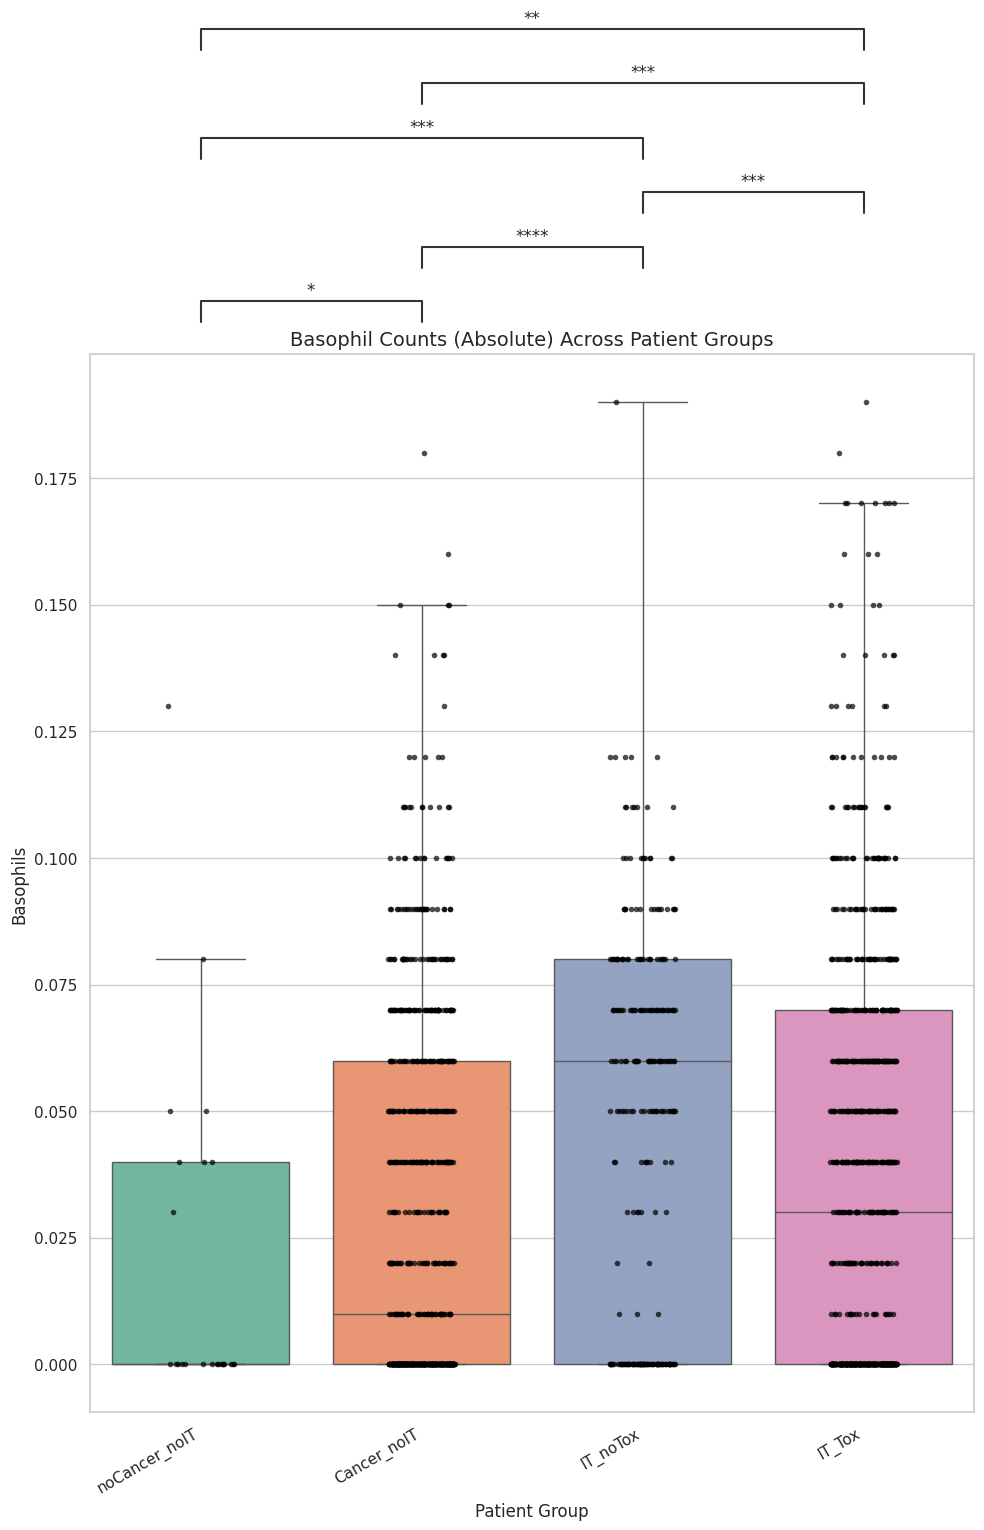

In [33]:
# Set seaborn style
sns.set(style="whitegrid")

# Optional: Ensure your groups are in the correct order
group_order = ['noCancer_noIT', 'Cancer_noIT', 'IT_noTox','IT_Tox']

# Create boxplot
plt.figure(figsize=(10, 16))
ax = sns.boxplot(
    data=cbc,
    x="GRP",
    y="BASOPHILES_ABS",
    order=group_order,
    palette="Set2",
    showfliers=False
)

comparisons = [
    ("noCancer_noIT", "Cancer_noIT"),
    ("noCancer_noIT", "IT_noTox"),
    ("noCancer_noIT", "IT_Tox"),
    ("Cancer_noIT", "IT_noTox"),
    ("Cancer_noIT", "IT_Tox"),
    ("IT_noTox", "IT_Tox")
]

# Annotate

annotator = Annotator(ax, comparisons, data=cbc, x="GRP", y="BASOPHILES_ABS", order=group_order)
annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='outside',
    verbose=2
)
annotator.apply_and_annotate()

sns.stripplot(
    data=cbc,
    x="GRP",
    y="BASOPHILES_ABS",
    order=group_order,
    color="black",
    size=4,
    jitter=0.15,
    alpha=0.7
)

# Customize plot
plt.title("Basophil Counts (Absolute) Across Patient Groups", fontsize=14)
plt.xlabel("Patient Group", fontsize=12)
plt.ylabel("Basophils", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [38]:
cbc.groupby('GRP')['BASOPHILES_ABS'].describe()

,count,mean,std,min,25%,50%,75%,max
GRP,,,,,,,,
Cancer_noIT,823.0,0.031446,0.038619,0.0,0.0,0.01,0.06,0.29
IT_Tox,950.0,0.040326,0.045668,0.0,0.0,0.03,0.07,0.35
IT_noTox,264.0,0.047879,0.037932,0.0,0.0,0.06,0.08,0.19
noCancer_noIT,24.0,0.019167,0.033090,0.0,0.0,0.00,0.04,0.13


# **One data point**

In [21]:
cbc = pd.read_excel('CBC_2025_03_21_clean.xlsx', sheet_name='Sheet1')
cbc['DATE_BAL'] = pd.to_datetime(cbc['DATE_BAL'], errors='coerce')
cbc

,IPP_CODED,SAMPLE_CODE,GRP,EXTRACTION,DATE_BAL,NUMERO_SEJOUR_CODED,DATE_PRELEVEMENT_CODED,DATE_ANALYSE_CODED,DATE_RECEPTION_CODED,LEUCOCYTES,...,BASOPHILES,GRANULOCYTES_IMMATURES,METAMYELOCYTES,MYELOCYTES,NEUTROPHILES_ABS,LYMPHOCYTES_ABS,MONOCYTES_ABS,EOSINOPHILES_ABS,BASOPHILES_ABS,GRAN_IMMATURES_ABS
0,P7692932968,101_T0,noCancer_noIT,A,2023-02-15,S61784861105,23-03-2023 15:42:00,23-03-2023 00:00:00,23-03-2023 16:34:43,5.1,...,1.0,0.6,NaN,NaN,2.55,1.63,0.77,0.15,0.05,0.03
1,P7692932968,101_T0,noCancer_noIT,A,2023-02-15,S61784861105,25-03-2023 06:00:00,25-03-2023 00:00:00,25-03-2023 06:50:49,9.2,...,0.0,0.4,NaN,NaN,7.45,0.92,0.83,0.00,0.00,0.04
2,P7692932968,101_T0,noCancer_noIT,A,2023-02-15,S61784861105,26-03-2023 06:00:00,26-03-2023 00:00:00,26-03-2023 06:32:21,6.3,...,0.0,0.3,NaN,NaN,4.41,1.20,0.63,0.06,0.00,0.02
3,P7692932968,101_T0,noCancer_noIT,A,2023-02-15,S61784861105,27-03-2023 06:00:00,27-03-2023 00:00:00,27-03-2023 06:39:15,6.1,...,0.0,0.5,NaN,NaN,4.51,1.10,0.43,0.06,0.00,0.03
4,P7692932968,101_T0,noCancer_noIT,A,2023-02-15,S61784861105,30-03-2023 06:00:00,30-03-2023 00:00:00,30-03-2023 06:41:33,7.3,...,0.0,6.1,NaN,NaN,4.45,1.68,0.58,0.15,0.00,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,P6864137687,446_t tox,IT_noTox,B,2024-03-19,S69078312485,02-07-2024 16:38:44,02-07-2024 00:00:00,02-07-2024 16:38:44,6.0,...,1.0,0.3,NaN,NaN,4.38,0.96,0.42,0.18,0.06,0.02
2129,P6864137687,446_t tox,IT_noTox,B,2024-03-19,S69078312485,13-08-2024 16:20:00,13-08-2024 00:00:00,13-08-2024 16:35:16,8.7,...,0.7,0.6,NaN,NaN,6.33,1.25,0.74,0.26,0.06,0.05
2130,P6864137687,446_t tox,IT_noTox,B,2024-03-19,S69078312485,15-10-2024 09:56:43,15-10-2024 00:00:00,15-10-2024 09:56:43,6.1,...,1.0,0.5,NaN,NaN,4.26,0.88,0.59,0.27,0.06,0.03
2131,P6864137687,446_t tox,IT_noTox,B,2024-03-19,S69078312485,12-11-2024 16:00:00,12-11-2024 00:00:00,12-11-2024 17:47:27,7.3,...,0.8,0.7,NaN,NaN,5.32,0.91,0.67,0.29,0.06,0.05


In [33]:
import pandas as pd
import numpy as np

# Step 1: Ensure date columns are in datetime format
cbc['DATE_ANALYSE_CODED'] = pd.to_datetime(cbc['DATE_ANALYSE_CODED'], format="%d-%m-%Y %H:%M:%S")
cbc['DATE_BAL'] = pd.to_datetime(cbc['DATE_BAL'], format="%d-%m-%Y %H:%M:%S")

# Step 2: Split by group condition
non_it_groups = ['noCancer_noIT', 'Cancer_noIT']
it_groups = ['IT_noTox', 'IT_Tox']

# Step 3: Get most recent CBC test for non-IT groups
non_it_df = (
    cbc[cbc['GRP'].isin(non_it_groups)]
    .sort_values('DATE_ANALYSE_CODED')
    .groupby('IPP_CODED', as_index=False)
    .last()
)

# Step 4: Get closest CBC test to bronchoscopy for IT groups
def get_closest_to_bal(df):
    df['timedelta'] = (df['DATE_ANALYSE_CODED'] - df['DATE_BAL']).abs()
    return df.loc[df['timedelta'].idxmin()]

it_df = (
    cbc[cbc['GRP'].isin(it_groups)]
    .groupby('IPP_CODED', group_keys=False)
    .apply(get_closest_to_bal)
)

# Step 5: Concatenate both DataFrames
final_df = pd.concat([non_it_df, it_df], ignore_index=True)

# (Optional) Sort by IPP or sample_code for consistency
final_df = final_df.sort_values('IPP_CODED')
final_df

<ipython-input-33-8223023eae5a>:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(get_closest_to_bal)


,IPP_CODED,SAMPLE_CODE,GRP,EXTRACTION,DATE_BAL,NUMERO_SEJOUR_CODED,DATE_PRELEVEMENT_CODED,DATE_ANALYSE_CODED,DATE_RECEPTION_CODED,LEUCOCYTES,...,GRANULOCYTES_IMMATURES,METAMYELOCYTES,MYELOCYTES,NEUTROPHILES_ABS,LYMPHOCYTES_ABS,MONOCYTES_ABS,EOSINOPHILES_ABS,BASOPHILES_ABS,GRAN_IMMATURES_ABS,timedelta
0,54810001,001_T0,Cancer_noIT,A,2022-05-03,S84259151637,04-01-2022 15:00:00,2022-01-04,04-01-2022 15:43:06,9.7,...,0.3,NaN,NaN,6.21,2.52,0.68,0.19,0.10,0.03,NaT
1,54810002,002_T0,Cancer_noIT,B,2022-05-03,S8047077797,13-12-2024 00:00:00,2024-12-13,13-12-2024 14:48:12,10.8,...,0.3,1.0,NaN,7.68,2.29,0.69,0.06,0.04,0.03,NaT
2,54810006,005_T0,Cancer_noIT,C,2022-05-04,S59062962484,14-02-2024 09:51:00,2024-02-14,14-02-2024 10:36:03,5.9,...,0.2,NaN,3.6,1.95,2.95,0.53,0.41,0.06,0.01,NaT
3,54810008,008_T0,Cancer_noIT,A,2022-05-11,S01563361899,14-10-2022 05:41:00,2022-10-14,14-10-2022 07:08:38,6.1,...,1.0,NaN,NaN,4.09,1.10,0.67,0.18,0.06,0.06,NaT
4,54810009,009_T0,Cancer_noIT,B,2022-05-11,S23796002121,07-08-2023 18:05:00,2023-08-07,07-08-2023 18:28:20,4.3,...,0.2,NaN,NaN,2.58,1.12,0.34,0.22,0.04,0.01,NaT
5,54810011,011_T0,Cancer_noIT,C,2022-05-12,S15121261540,09-08-2022 18:47:00,2022-08-09,09-08-2022 19:05:29,9.0,...,0.3,NaN,NaN,5.94,1.71,1.08,0.27,0.09,0.03,NaT
6,54810012,012_T0,Cancer_noIT,A,2022-05-10,S97220261668,21-08-2022 06:00:00,2022-08-21,21-08-2022 07:07:37,4.4,...,0.7,NaN,NaN,3.34,0.44,0.48,0.09,0.04,0.03,NaT
7,54810014,015_T0,Cancer_noIT,B,2022-05-17,S28311122771,31-10-2023 06:00:00,2023-10-31,31-10-2023 06:28:21,6.6,...,1.2,3.0,0.9,4.09,0.99,0.92,0.46,0.07,0.08,NaT
8,54810016,016_T0,Cancer_noIT,C,2022-05-18,S35041751442,25-06-2024 15:30:00,2024-06-25,25-06-2024 15:54:43,7.3,...,0.5,NaN,0.9,4.23,2.12,0.66,0.22,0.07,0.04,NaT
9,54810020,021_T0,Cancer_noIT,B,2022-05-18,S83813161227,29-07-2022 06:00:00,2022-07-29,29-07-2022 07:00:12,8.2,...,0.6,NaN,NaN,7.05,0.41,0.57,0.16,0.00,0.05,NaT


In [40]:
final_df['GRP'].value_counts()

,count
GRP,
Cancer_noIT,21
IT_Tox,14
IT_noTox,6
noCancer_noIT,2


<ipython-input-47-f0cf2e16526b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

noCancer_noIT vs. Cancer_noIT: Mann-Whitney-Wilcoxon test two-sided, P_val:4.847e-02 U_stat=7.660e+03
Cancer_noIT vs. IT_noTox: Mann-Whitney-Wilcoxon test two-sided, P_val:2.085e-10 U_stat=8.150e+04
IT_noTox vs. IT_Tox: Mann-Whitney-Wilcoxon test two-sided, P_val:1.162e-04 U_stat=1.443e+05
noCancer_noIT vs. IT_noTox: Mann-Whitney-Wilcoxon test two-sided, P_val:1.995e-04 U_stat=1.748e+03
Cancer_noIT vs. IT_Tox: Mann-Whitney-Wilcoxon test two-sided, P_val:1.814e-04 U_stat=3.522e+05
noCancer_noIT vs. IT_Tox: Mann-Whitney-Wilcoxon test two-sided, P_val:7.285e-03 U_stat=7.870e+03


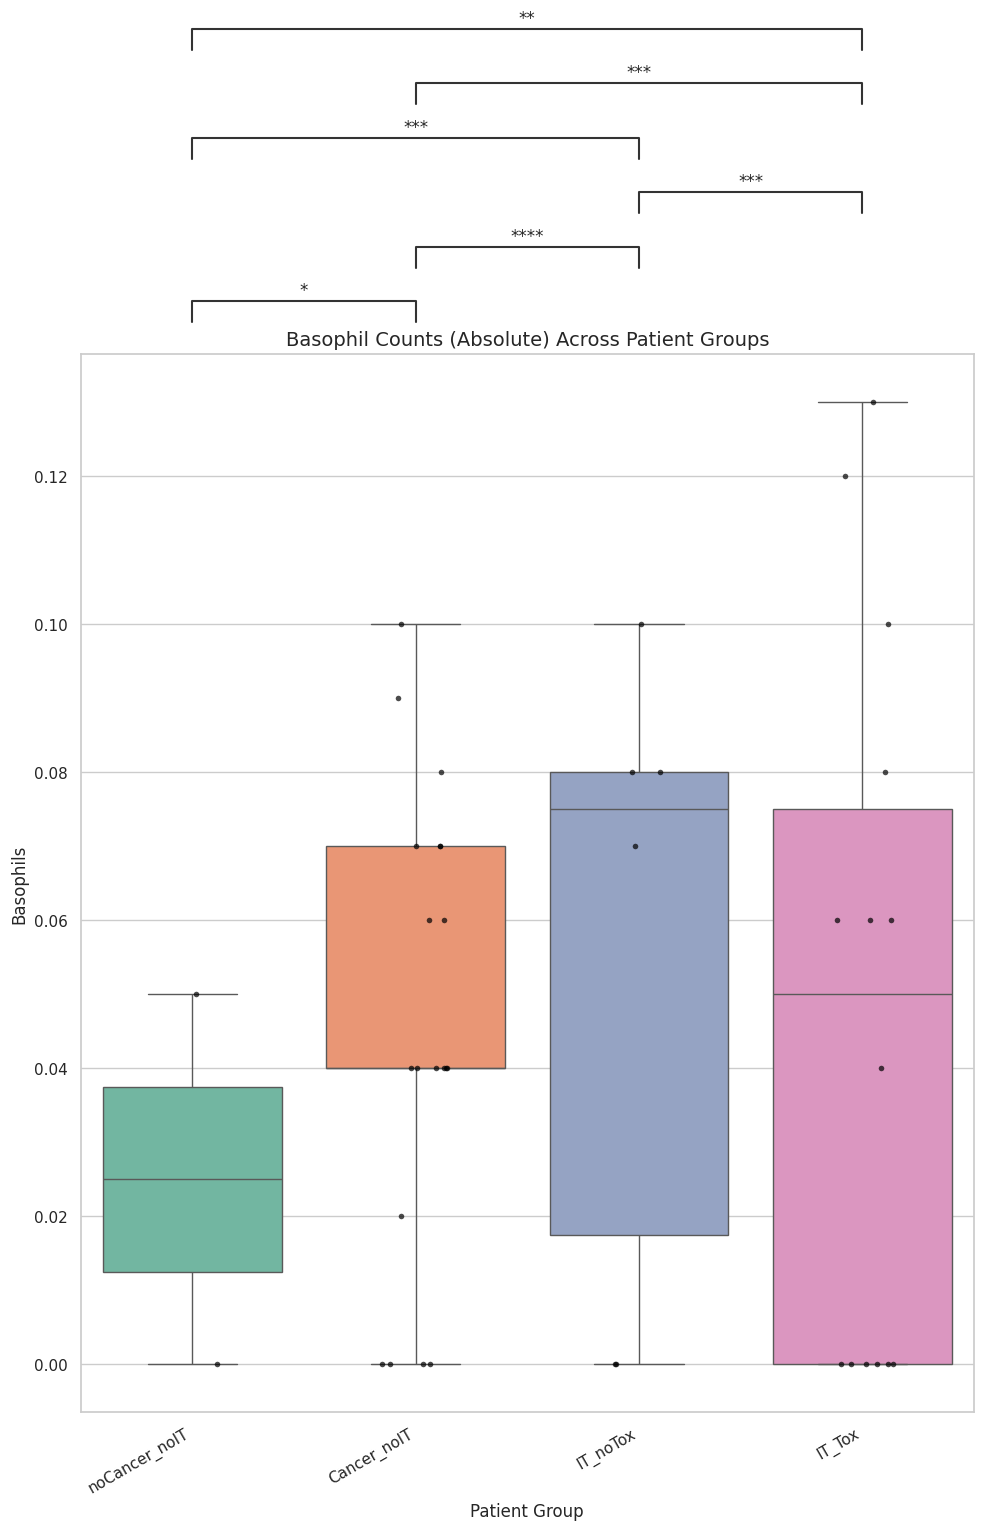

In [47]:
# Set seaborn style
sns.set(style="whitegrid")

# Optional: Ensure your groups are in the correct order
group_order = ['noCancer_noIT', 'Cancer_noIT', 'IT_noTox','IT_Tox']

# Create boxplot
plt.figure(figsize=(10, 16))
ax = sns.boxplot(
    data=final_df,
    x="GRP",
    y="BASOPHILES_ABS",
    order=group_order,
    palette="Set2",
    showfliers=False
)

comparisons = [
    ("noCancer_noIT", "Cancer_noIT"),
    ("noCancer_noIT", "IT_noTox"),
    ("noCancer_noIT", "IT_Tox"),
    ("Cancer_noIT", "IT_noTox"),
    ("Cancer_noIT", "IT_Tox"),
    ("IT_noTox", "IT_Tox")
]

# Annotate

annotator = Annotator(ax, comparisons, data=cbc, x="GRP", y="BASOPHILES_ABS", order=group_order)
annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='outside',
    verbose=2
)
annotator.apply_and_annotate()

sns.stripplot(
    data=final_df,
    x="GRP",
    y="BASOPHILES_ABS",
    order=group_order,
    color="black",
    size=4,
    jitter=0.15,
    alpha=0.7
)

# Customize plot
plt.title("Basophil Counts (Absolute) Across Patient Groups", fontsize=14)
plt.xlabel("Patient Group", fontsize=12)
plt.ylabel("Basophils", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [45]:
final_df.groupby('GRP')['BASOPHILES_ABS'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
GRP,,,,,,,,
IT_noTox,6.0,0.055000,0.043704,0.0,0.0175,0.075,0.0800,0.10
Cancer_noIT,21.0,0.054762,0.042145,0.0,0.0400,0.040,0.0700,0.15
IT_Tox,14.0,0.046429,0.047975,0.0,0.0000,0.050,0.0750,0.13
noCancer_noIT,2.0,0.025000,0.035355,0.0,0.0125,0.025,0.0375,0.05
